In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   # عرض الرسومات داخل Jupyter

UsageError: unrecognized arguments: # عرض الرسومات داخل Jupyter


In [3]:
# قراءة البيانات
file_path = r'C:\Users\m\Desktop\MICROSOFT DA\smartphone_sales_dataset.csv'
df = pd.read_csv(file_path)
# معاينة أول 5 صفوف
print("🔍 Preview of data:")
display(df.head())

🔍 Preview of data:


,Phone_ID,Brand,RAM_GB,Storage_GB,Screen_Size,Price_USD,Battery_mAh,OS,Rating,Quantity_Sold,Sales_Revenue,Profit
0,1,OnePlus,8,256,7.15,395.0,3227.0,Android,4.3,66,26070.0,6517.5
1,2,Google,12,256,6.44,228.0,5881.0,Android,3.5,100,22800.0,5700.0
2,3,Xiaomi,16,1024,7.23,905.0,3857.0,iOS,4.8,496,NaN,112220.0
3,4,Google,16,512,6.49,NaN,4268.0,iOS,4.7,319,389180.0,97295.0
4,5,Google,16,128,7.03,NaN,5865.0,Android,4.0,364,78260.0,NaN


In [4]:
# معلومات أولية عن البيانات
print("\nℹ️ Initial Data Info:")
df.info()


ℹ️ Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Phone_ID       2000 non-null   int64  
 1   Brand          2000 non-null   object 
 2   RAM_GB         2000 non-null   int64  
 3   Storage_GB     2000 non-null   int64  
 4   Screen_Size    2000 non-null   float64
 5   Price_USD      1900 non-null   float64
 6   Battery_mAh    1940 non-null   float64
 7   OS             2000 non-null   object 
 8   Rating         2000 non-null   float64
 9   Quantity_Sold  2000 non-null   int64  
 10  Sales_Revenue  1900 non-null   float64
 11  Profit         1940 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 187.6+ KB


In [5]:
# التحقق من القيم المفقودة
print("\n❗ Missing Values:")
print(df.isnull().sum())


❗ Missing Values:
Phone_ID           0
Brand              0
RAM_GB             0
Storage_GB         0
Screen_Size        0
Price_USD        100
Battery_mAh       60
OS                 0
Rating             0
Quantity_Sold      0
Sales_Revenue    100
Profit            60
dtype: int64


In [6]:
# تنظيف الأعمدة النصية
text_columns = ['Brand', 'OS']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.lower()
# حذف الصفوف التي تحتوي على قيم مفقودة
df.dropna(inplace=True)

# التأكد من أن التقييم بين 1 و 5
df = df[df['Rating'].between(1, 5)]

# التأكد من أن القيم الرقمية موجبة
numeric_cols = ['RAM_GB', 'Storage_GB', 'Screen_Size', 'Price_USD', 
                'Battery_mAh', 'Quantity_Sold', 'Sales_Revenue', 'Profit']
for col in numeric_cols:
    df = df[df[col] > 0]

# إزالة القيم الشاذة في Price_USD باستخدام IQR
Q1 = df['Price_USD'].quantile(0.25)
Q3 = df['Price_USD'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price_USD'] >= Q1 - 1.5 * IQR) & (df['Price_USD'] <= Q3 + 1.5 * IQR)]

# إعادة تعيين الفهرس
df.reset_index(drop=True, inplace=True)

# فحص نهائي
print("\n✅ Cleaned Data Summary:")
display(df.describe())

print("\n📋 Final Data Info:")
df.info()


✅ Cleaned Data Summary:


,Phone_ID,RAM_GB,Storage_GB,Screen_Size,Price_USD,Battery_mAh,Rating,Quantity_Sold,Sales_Revenue,Profit
count,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000
mean,1000.284534,9.329398,401.756789,6.261110,866.838843,4524.098583,3.996930,275.988784,238134.726682,59533.681671
std,575.353099,4.364262,349.227242,0.724669,369.798538,864.764418,0.581383,128.336577,156274.014777,39068.503694
min,1.000000,4.000000,64.000000,5.000000,200.000000,3002.000000,3.000000,50.000000,11600.000000,2900.000000
25%,499.250000,6.000000,128.000000,5.640000,558.000000,3761.000000,3.500000,166.000000,110830.500000,27707.625000
50%,1001.000000,8.000000,256.000000,6.245000,865.000000,4525.000000,4.000000,277.000000,202349.000000,50587.250000
75%,1494.750000,12.000000,512.000000,6.900000,1188.750000,5283.000000,4.500000,383.000000,332413.500000,83103.375000
max,2000.000000,16.000000,1024.000000,7.500000,1499.000000,5999.000000,5.000000,499.000000,738514.000000,184628.500000



📋 Final Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Phone_ID       1694 non-null   int64  
 1   Brand          1694 non-null   object 
 2   RAM_GB         1694 non-null   int64  
 3   Storage_GB     1694 non-null   int64  
 4   Screen_Size    1694 non-null   float64
 5   Price_USD      1694 non-null   float64
 6   Battery_mAh    1694 non-null   float64
 7   OS             1694 non-null   object 
 8   Rating         1694 non-null   float64
 9   Quantity_Sold  1694 non-null   int64  
 10  Sales_Revenue  1694 non-null   float64
 11  Profit         1694 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 158.9+ KB


In [7]:
# إجمالي الإيرادات
total_revenue = df['Sales_Revenue'].sum()
print("✅ Total Sales Revenue: $", total_revenue)

# إجمالي الربح
total_profit = df['Profit'].sum()
print("✅ Total Profit: $", total_profit)


✅ Total Sales Revenue: $ 403400227.0
✅ Total Profit: $ 100850056.75


In [8]:
# حساب إجمالي الربح
total_profit = df['Profit'].sum()
print("✅ Total Profit: $", total_profit)


✅ Total Profit: $ 100850056.75


In [9]:
# حساب عدد الوحدات المباعة لكل علامة تجارية
units_sold_per_brand = df.groupby('Brand')['Quantity_Sold'].sum()
print("✅ Number of units sold per Brand:\n", units_sold_per_brand)


✅ Number of units sold per Brand:
 Brand
apple      74442
google     77785
huawei     78643
oneplus    78879
samsung    83244
xiaomi     74532
Name: Quantity_Sold, dtype: int64


In [10]:
# حساب متوسط السعر لكل علامة تجارية
avg_price_per_brand = df.groupby('Brand')['Price_USD'].mean()
print("✅ Average price per Brand:\n", avg_price_per_brand)


✅ Average price per Brand:
 Brand
apple      864.634409
google     858.070671
huawei     844.732852
oneplus    872.619217
samsung    894.894389
xiaomi     863.498155
Name: Price_USD, dtype: float64


In [11]:
# الهاتف الأعلى تقييمًا
top_rated_phone = df.loc[df['Rating'].idxmax()]
print("✅ Top-rated phone:\n", top_rated_phone[['Phone_ID', 'Brand', 'Rating']])


✅ Top-rated phone:
 Phone_ID        64
Brand       huawei
Rating         5.0
Name: 49, dtype: object


In [12]:
# حساب متوسط التقييم لكل نظام تشغيل
avg_rating_per_os = df.groupby('OS')['Rating'].mean()
print("✅ Average rating per OS:\n", avg_rating_per_os)


✅ Average rating per OS:
 OS
android    3.993059
ios        4.016312
Name: Rating, dtype: float64


In [13]:
# عرض أكثر الهواتف ربحًا
most_profitable_phones = df[['Phone_ID', 'Brand', 'Profit']].sort_values(by='Profit', ascending=False)
print("✅ Most profitable phones:\n", most_profitable_phones.head())


✅ Most profitable phones:
       Phone_ID    Brand     Profit
915       1080   huawei  184628.50
1587      1875  samsung  183264.00
1415      1668   google  179328.75
412        487   huawei  177631.50
1425      1678   huawei  177511.50


In [14]:
# حساب متوسط الربح لكل وحدة مباعة
df['Profit_Per_Unit'] = df['Profit'] / df['Quantity_Sold']
avg_profit_per_unit = df['Profit_Per_Unit'].mean()
print("✅ Average profit per unit sold: $", avg_profit_per_unit)


✅ Average profit per unit sold: $ 216.70971074380165


In [15]:
# مقارنة بين Android و iOS من حيث الإيرادات، الربح، والمبيعات
comparison = df.groupby('OS').agg({'Sales_Revenue': 'sum', 'Profit': 'sum', 'Quantity_Sold': 'sum'})
print("✅ Comparison of Android vs iOS:\n", comparison)


✅ Comparison of Android vs iOS:
          Sales_Revenue       Profit  Quantity_Sold
OS                                                
android    336978660.0  84244665.00         390039
ios         66421567.0  16605391.75          77486


In [16]:
# حساب الترابط بين RAM وحجم المبيعات
correlation_ram_sales = df['RAM_GB'].corr(df['Quantity_Sold'])
print("✅ Correlation between RAM and Sales:", correlation_ram_sales)


✅ Correlation between RAM and Sales: 0.005955517407871204


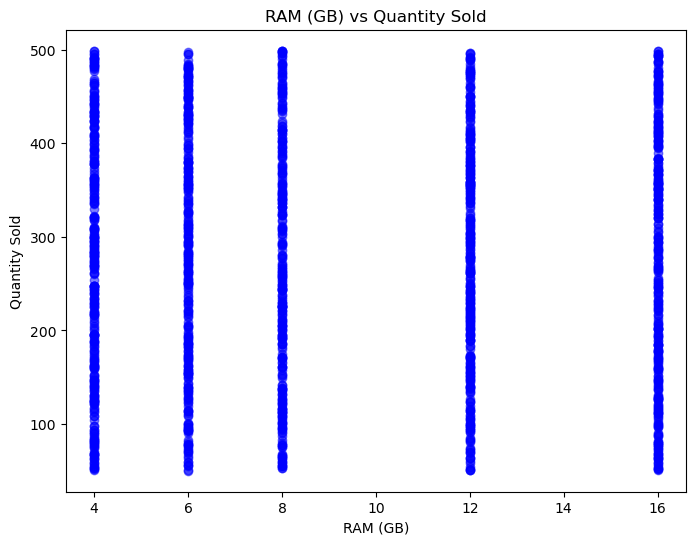

In [17]:
import matplotlib.pyplot as plt

# رسم علاقة RAM وحجم المبيعات
plt.figure(figsize=(8, 6))
plt.scatter(df['RAM_GB'], df['Quantity_Sold'], alpha=0.5, color='b')
plt.title('RAM (GB) vs Quantity Sold')
plt.xlabel('RAM (GB)')
plt.ylabel('Quantity Sold')
plt.show()


In [18]:
# حساب الترابط بين حجم البطارية وحجم المبيعات
correlation_battery_sales = df['Battery_mAh'].corr(df['Quantity_Sold'])
print("✅ Correlation between Battery Size and Sales:", correlation_battery_sales)


✅ Correlation between Battery Size and Sales: 0.03447013519054597


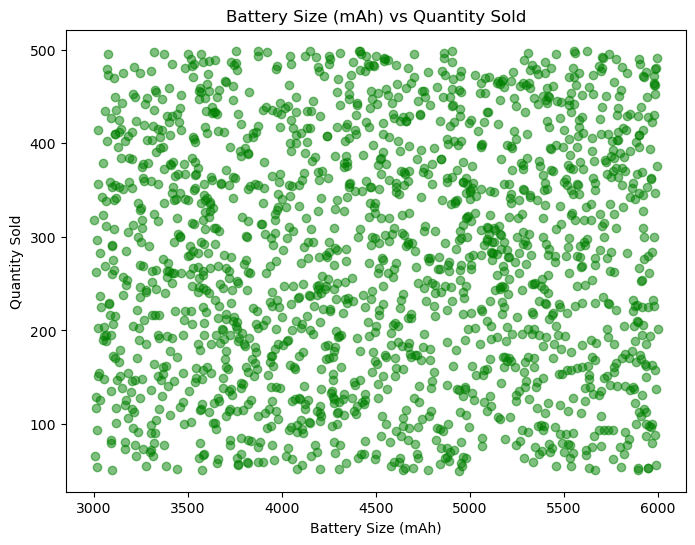

In [19]:
# رسم علاقة Battery size وحجم المبيعات
plt.figure(figsize=(8, 6))
plt.scatter(df['Battery_mAh'], df['Quantity_Sold'], alpha=0.5, color='g')
plt.title('Battery Size (mAh) vs Quantity Sold')
plt.xlabel('Battery Size (mAh)')
plt.ylabel('Quantity Sold')
plt.show()


In [20]:
# حساب الترابط بين السعر وحجم المبيعات
correlation_price_sales = df['Price_USD'].corr(df['Quantity_Sold'])
print("✅ Correlation between Price and Sales:", correlation_price_sales)


✅ Correlation between Price and Sales: -0.023256505467479205


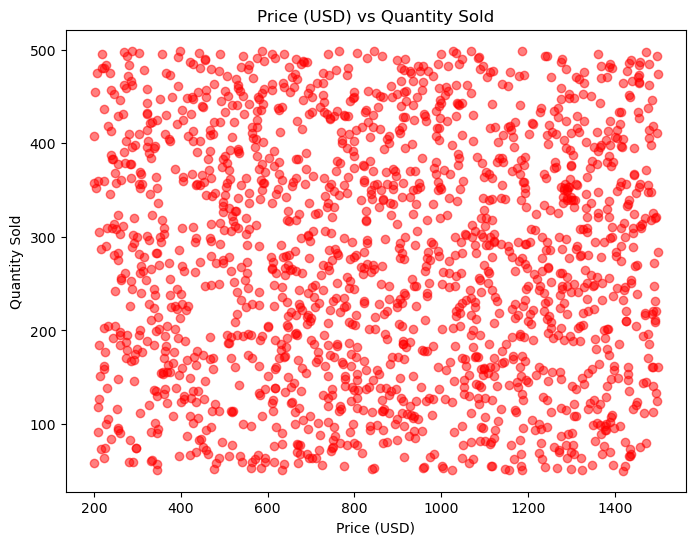

In [21]:
# رسم علاقة السعر وحجم المبيعات
plt.figure(figsize=(8, 6))
plt.scatter(df['Price_USD'], df['Quantity_Sold'], alpha=0.5, color='r')
plt.title('Price (USD) vs Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.show()


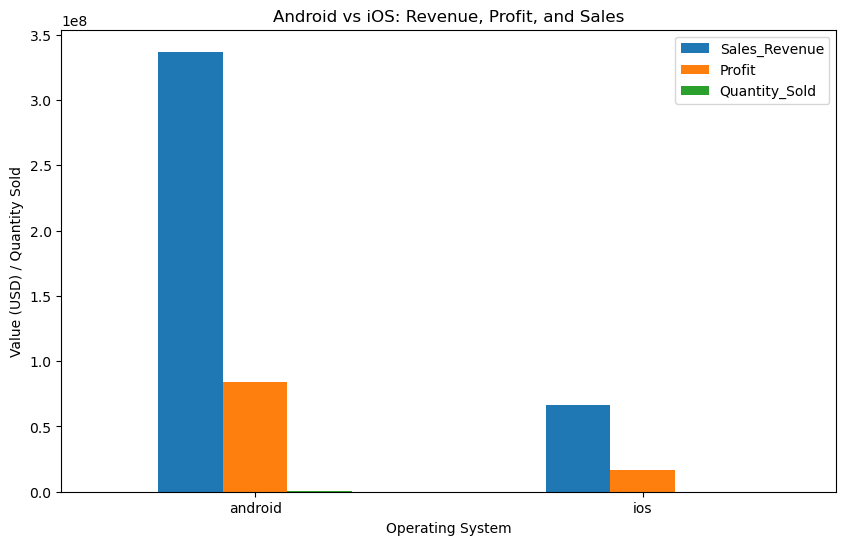

In [22]:
# عرض مقارنة الإيرادات والربح والمبيعات بين Android و iOS باستخدام رسم بياني
comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Android vs iOS: Revenue, Profit, and Sales')
plt.ylabel('Value (USD) / Quantity Sold')
plt.xlabel('Operating System')
plt.xticks(rotation=0)
plt.show()


In [23]:
# عرض ملخص للنتائج
summary = {
    "Total Sales Revenue": total_revenue,
    "Total Profit": total_profit,
    "Top-rated Phone": top_rated_phone[['Phone_ID', 'Brand', 'Rating']],
    "Average Rating per OS": avg_rating_per_os,
    "Most Profitable Phones": most_profitable_phones.head(),
    "Average Profit per Unit Sold": avg_profit_per_unit,
    "Android vs iOS Comparison": comparison
}

print("✅ Summary of Analysis:\n")
for key, value in summary.items():
    print(f"{key}:")
    print(value)
    print("\n")


✅ Summary of Analysis:

Total Sales Revenue:
403400227.0


Total Profit:
100850056.75


Top-rated Phone:
Phone_ID        64
Brand       huawei
Rating         5.0
Name: 49, dtype: object


Average Rating per OS:
OS
android    3.993059
ios        4.016312
Name: Rating, dtype: float64


Most Profitable Phones:
      Phone_ID    Brand     Profit
915       1080   huawei  184628.50
1587      1875  samsung  183264.00
1415      1668   google  179328.75
412        487   huawei  177631.50
1425      1678   huawei  177511.50


Average Profit per Unit Sold:
216.70971074380165


Android vs iOS Comparison:
         Sales_Revenue       Profit  Quantity_Sold
OS                                                
android    336978660.0  84244665.00         390039
ios         66421567.0  16605391.75          77486




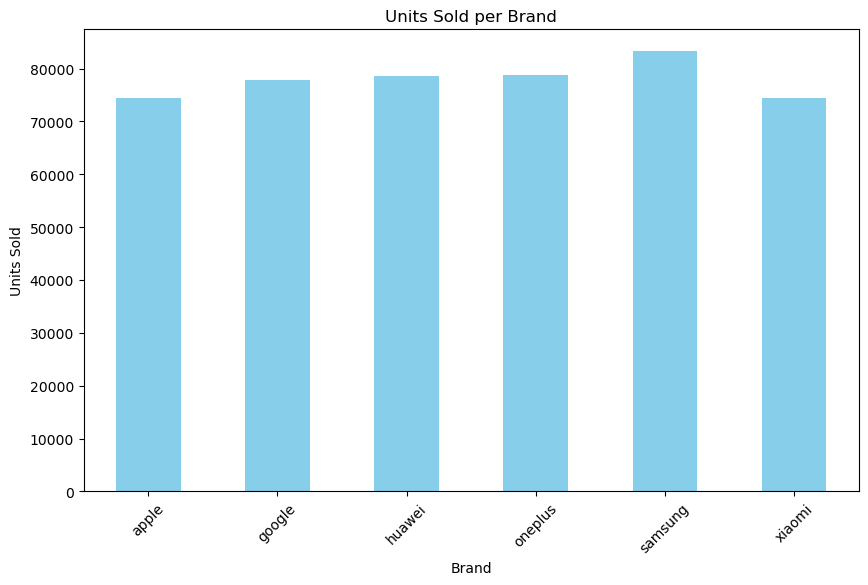

In [24]:
# رسم بياني لعدد الوحدات المباعة حسب العلامة التجارية
units_sold_per_brand.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Units Sold per Brand')
plt.xlabel('Brand')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


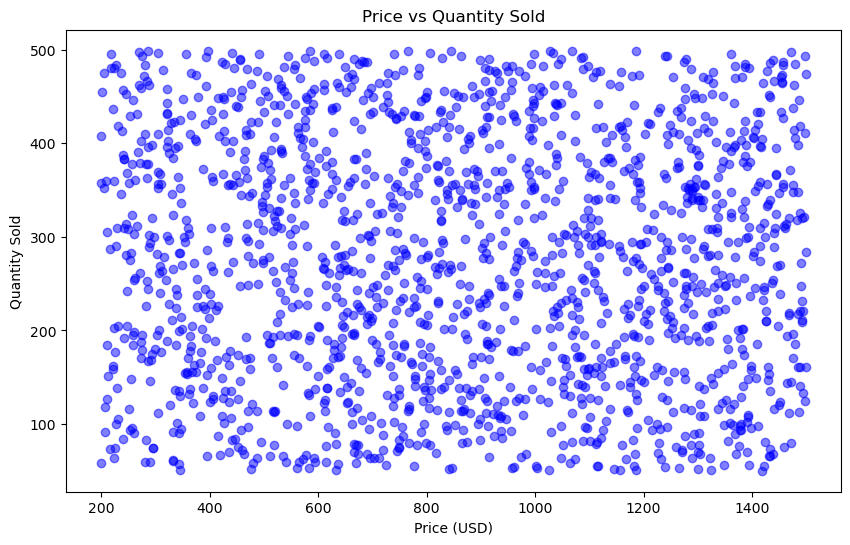

In [25]:
# رسم بياني للمبيعات حسب الأسعار
plt.figure(figsize=(10, 6))
plt.plot(df['Price_USD'], df['Quantity_Sold'], 'bo', alpha=0.5)
plt.title('Price vs Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.show()


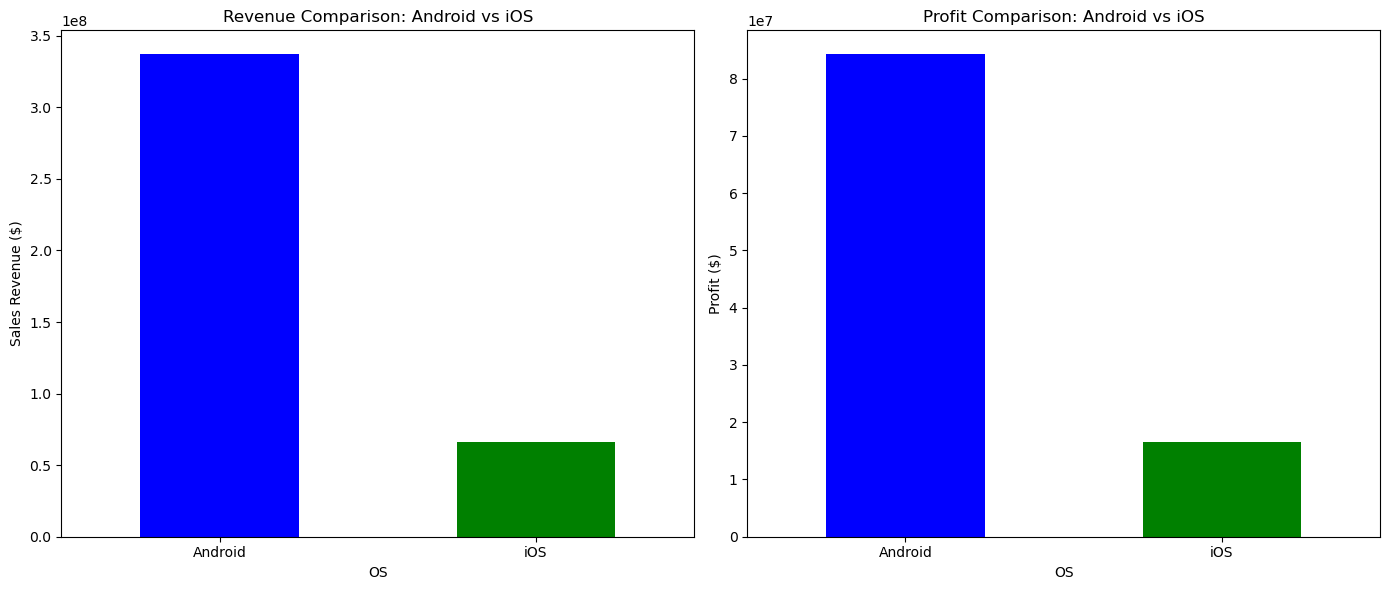

In [26]:
# رسم بياني لمقارنة الإيرادات والربح بين Android و iOS
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# الإيرادات
comparison['Sales_Revenue'].plot(kind='bar', ax=ax[0], color=['blue', 'green'])
ax[0].set_title('Revenue Comparison: Android vs iOS')
ax[0].set_xlabel('OS')
ax[0].set_ylabel('Sales Revenue ($)')
ax[0].set_xticklabels(['Android', 'iOS'], rotation=0)

# الربح
comparison['Profit'].plot(kind='bar', ax=ax[1], color=['blue', 'green'])
ax[1].set_title('Profit Comparison: Android vs iOS')
ax[1].set_xlabel('OS')
ax[1].set_ylabel('Profit ($)')
ax[1].set_xticklabels(['Android', 'iOS'], rotation=0)

plt.tight_layout()
plt.show()


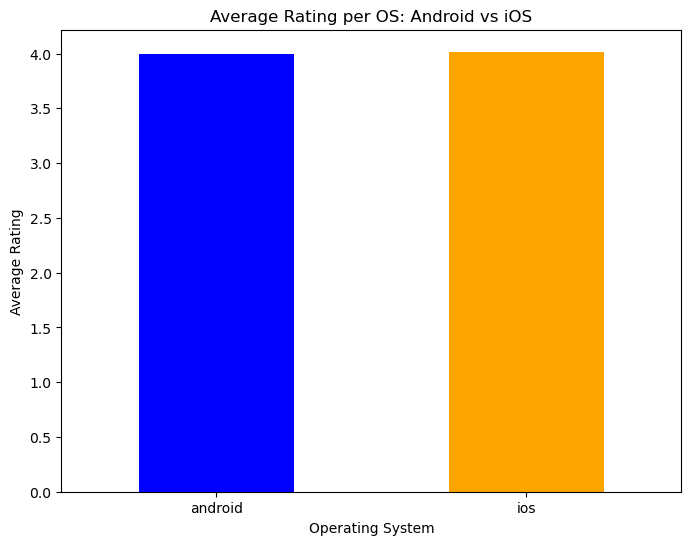

In [27]:
# رسم بياني للمقارنة بين التقييمات لأنظمة Android و iOS
plt.figure(figsize=(8, 6))
avg_rating_per_os.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Rating per OS: Android vs iOS')
plt.xlabel('Operating System')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()
